In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student_performance_prediction.csv")
print(df.shape)
print(df.head(10))

(40000, 7)
  Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0     S00001                  12.5              NaN             75.0   
1     S00002                   9.3             95.3             60.6   
2     S00003                  13.2              NaN             64.0   
3     S00004                  17.6             76.8             62.4   
4     S00005                   8.8             89.3             72.7   
5     S00006                   8.8             73.8             69.3   
6     S00007                  17.9             38.6             93.6   
7     S00008                  13.8             95.8             59.2   
8     S00009                   7.7            100.1             91.9   
9     S00010                  12.7             38.4             37.8   

  Participation in Extracurricular Activities Parent Education Level Passed  
0                                         Yes                 Master    Yes  
1                                       

In [3]:
print(df.dtypes)

Student ID                                      object
Study Hours per Week                           float64
Attendance Rate                                float64
Previous Grades                                float64
Participation in Extracurricular Activities     object
Parent Education Level                          object
Passed                                          object
dtype: object


In [4]:
print(df.isna().sum())

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64


In [5]:
# EDA 
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [6]:
df_clean = df.copy()
df_clean = df_clean[(df_clean["Study Hours per Week"]>=0) &
                    (df_clean["Attendance Rate"]>=0) &
                    (df_clean["Attendance Rate"]<=100) &
                    (df_clean["Previous Grades"]<=100)
                    ]

In [7]:
df_clean.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,29447.000000,29447.000000,29447.000000
mean,10.248436,71.024675,64.666492
std,4.712729,16.800929,14.522925
min,-0.000000,0.500000,8.300000
25%,6.900000,59.800000,54.900000
50%,10.100000,72.500000,65.000000
75%,13.500000,84.000000,74.700000
max,32.400000,100.000000,100.000000


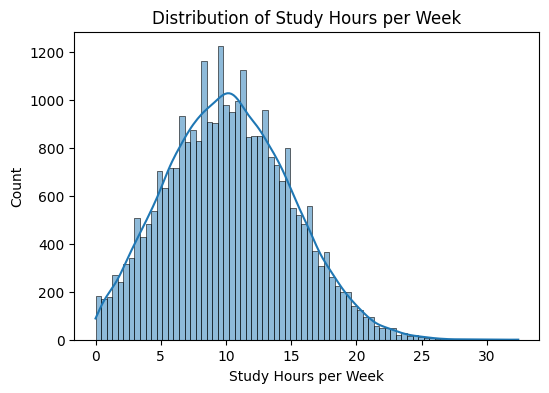

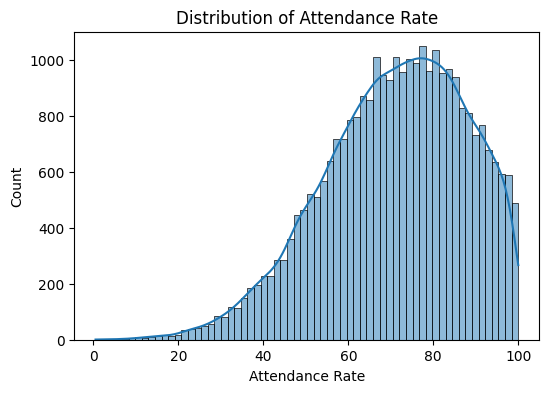

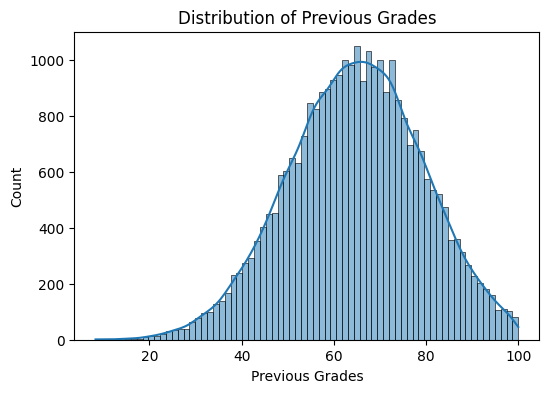

In [8]:
import seaborn as sns

col = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

for cols in col:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean[cols], kde=True)
    plt.title(f'Distribution of {cols}')
    plt.show()


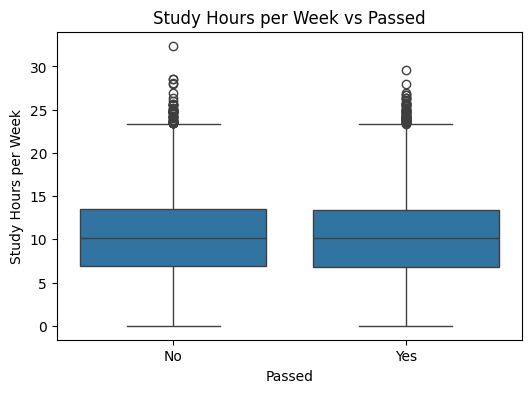

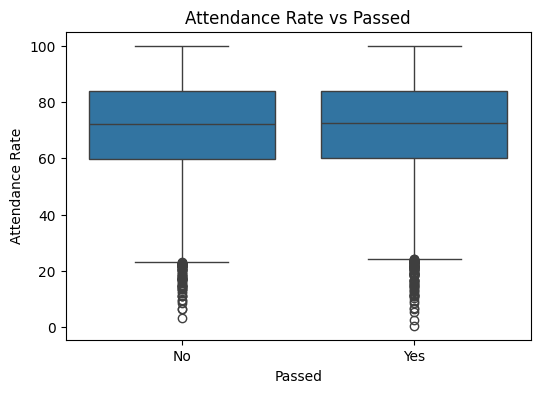

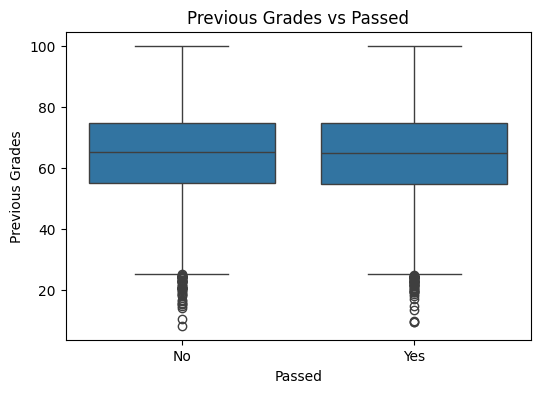

In [9]:
for cols in col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_clean['Passed'], y=df_clean[cols])
    plt.title(f'{cols} vs Passed')
    plt.show()


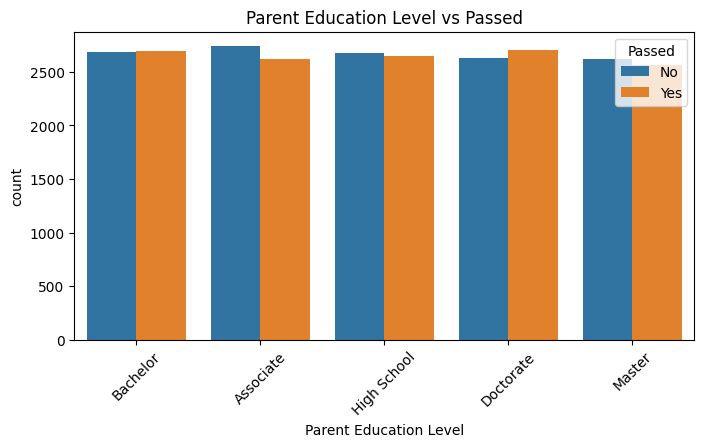

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(
    x='Parent Education Level',
    hue='Passed',
    data=df_clean,
    order=df_clean['Parent Education Level'].value_counts().index
)
plt.xticks(rotation=45)
plt.title('Parent Education Level vs Passed')
plt.show()


In [11]:
df_corr = df_clean.copy()

df_corr['Participation in Extracurricular Activities'] = (
    df_corr['Participation in Extracurricular Activities']
    .astype(str).str.lower().map({'yes': 1, 'no': 0})
)

df_corr['Passed'] = (
    df_corr['Passed']
    .astype(str).str.lower().map({'yes': 1, 'no': 0})
)

df_corr = df_corr.drop(columns=['Student ID','Parent Education Level'])

In [12]:
corr_matrix = df_corr.corr()
corr_matrix


,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Passed
Study Hours per Week,1.000000,0.002026,0.001608,0.005952,-0.014170
Attendance Rate,0.002026,1.000000,-0.004886,0.001646,0.002145
Previous Grades,0.001608,-0.004886,1.000000,-0.001521,-0.004538
Participation in Extracurricular Activities,0.005952,0.001646,-0.001521,1.000000,0.006364
Passed,-0.014170,0.002145,-0.004538,0.006364,1.000000


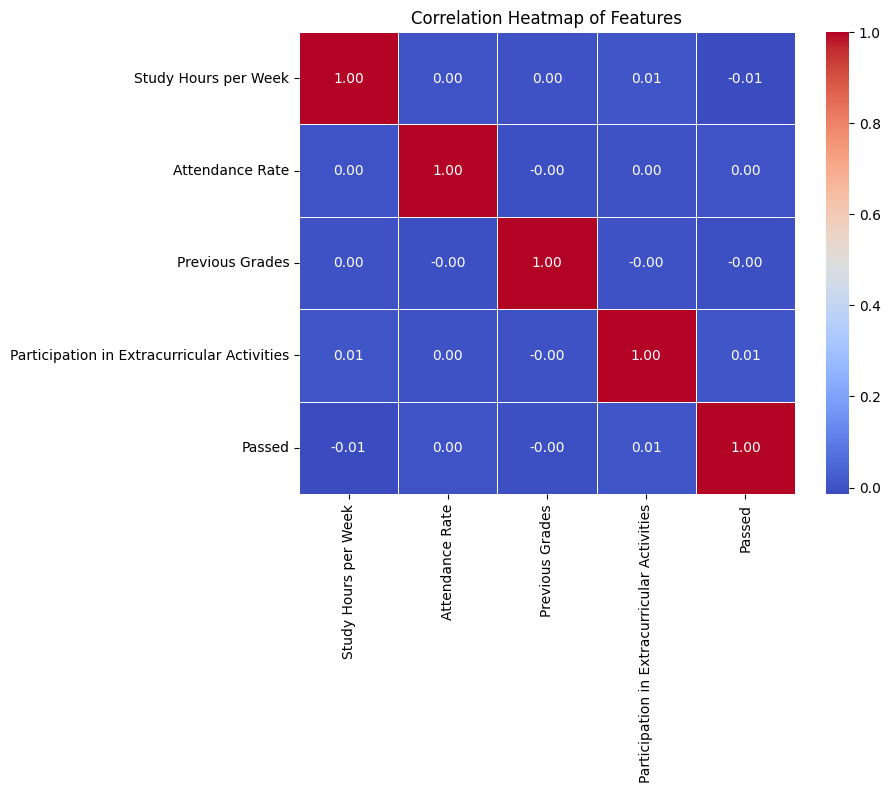

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Features")
plt.show()

In [14]:
df1 = df_clean.copy()

In [15]:
df1['Parent Education Level'].unique()

array(['High School', 'Bachelor', 'Master', 'Doctorate', nan, 'Associate'],
      dtype=object)

In [16]:
edu_map = {
    'high school': 1,
    'associate': 2,
    'bachelor': 3,
    'master': 4,
    'doctorate': 5
}

df1['Parent Education Level'] = (
    df1['Parent Education Level']
    .astype(str)
    .str.strip()
    .str.lower()
    .map(edu_map)
)

In [17]:
df1['Participation in Extracurricular Activities'] = (
    df1['Participation in Extracurricular Activities'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
)


In [18]:
df1['Passed'] = (
    df1['Passed'].astype(str).str.lower().map({'yes':1,'no':0})
)

In [19]:
df1.isnull().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    1484
Parent Education Level                         1460
Passed                                         1482
dtype: int64

In [20]:
df1 = df1.dropna(subset=['Passed'])

In [21]:
df1.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    1418
Parent Education Level                         1382
Passed                                            0
dtype: int64

In [22]:
df1['Participation in Extracurricular Activities'] = df1['Participation in Extracurricular Activities'].fillna(0)

In [23]:
mode_value = df1['Parent Education Level'].mode()[0]
df1['Parent Education Level'] = df1['Parent Education Level'].fillna(mode_value)

In [24]:
df1.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [25]:
df1.drop(columns=['Student ID'], inplace=True)

In [26]:
df1.isna().sum()

Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [27]:
df2 = df1.copy()

In [28]:
X = df2.drop(columns=['Passed'])
y = df2["Passed"]

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state= 42,
    stratify=y
    )

In [30]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [32]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = lr_model.predict(X_test_scaled)

In [34]:
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score


cm = confusion_matrix(y_test, y_pred_class)

accuracy = accuracy_score(y_test, y_pred_class)

precision = precision_score(y_test, y_pred_class)

recall = recall_score(y_test, y_pred_class)

f1 = f1_score(y_test, y_pred_class)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
 [[1631 1176]
 [1621 1165]]
Accuracy: 0.4999
Precision: 0.4977
Recall: 0.4182
F1 Score: 0.4545


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(X_train_scaled, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_rf = rf_model.predict(X_test_scaled)  

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Random Forest Results:
Confusion Matrix:
 [[1469 1338]
 [1420 1366]]
Accuracy: 0.5069
Precision: 0.5052
Recall: 0.4903
F1 Score: 0.4976
R2 Score -0.9724933896414749
